# Data Pre-Processing
#### Import Packages and CSV

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns",None)

df = pd.read_csv("EasyVisa.csv")
print(df.shape)

(25480, 12)


# Data Cleaning	
    *	Handling Missing Values - Eksik Değerlerin Ele Alınması
	*	Handling Duplicates - Çift Kopyaların Ele Alınması
	*	Check Data Type - Veri Tiplerini Kontrol Etme
	*	Understand the Dataset - Veriyi Anlama
		
## Check Null Values - Null (Boş) Değerleri Kontrol Etme

In [11]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5))

In [12]:
features_with_na

[]

* Veri setinde null (boş) değerler yok.

# 3.2 Diğer Veri Temizleme Adımları
   * Çift Kopyaların Ele Alınması

In [13]:
df.duplicated().sum()

0

* Veri setinde çift kopya yok.
* case_id’yi veri setinden çıkarın, çünkü model eğitiminde kullanılamaz.

In [14]:
df.drop('case_id',inplace=True, axis=1)

# Feature Engineering (Özellik Mühendisliği)
  ###  Feature Extraction (Özellik Çıkartma)

In [15]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [16]:
from datetime import date
todays_date = date.today()
current_year = todays_date.year

In [17]:
df['company_age'] = current_year - df['yr_of_estab']

In [18]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20


In [19]:
df.drop('yr_of_estab',inplace=True, axis=1)

# Type of Features (Özellik Türleri)

#### Numeric Features (Sayısal Özellikler)

In [20]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Sayısal sütunların adeti :',len(num_features) )

Sayısal sütunların adeti : 3


#### Categorical Features (Kategorik Özellikler)

In [21]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Kategorik sütunların adeti : ',len(cat_features))

Kategorik sütunların adeti :  8


#### Discrete Features (Sürekli Olmayan Özellikler)

In [22]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Sürekli Olmayan Sütunların Adeti :',len(discrete_features))

Sürekli Olmayan Sütunların Adeti : 0


#### Continuous Features (Sürekli Özellikler)

In [23]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Sürekli sütunların adeti :',len(continuous_features))
print(continuous_features)

Sürekli sütunların adeti : 3
['no_of_employees', 'prevailing_wage', 'company_age']


# Split X and Y

* DataFrame’i X ve y olarak ayırma
* Burada, bağımsız sütunları temsil eden X değişkenini ve bağımlı sütun olan “Case_Status” sütununu içeren y değişkenini belirliyoruz.

In [24]:
X = df.drop('case_status',axis=1)
y = df['case_status']

In [25]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

### Manuel encoding target column

In [26]:
# Target column içerisindeki Denied olanlara 1 Certified olanlara 0 atayalım
y = np.where(y=='Denied',1,0)

In [27]:
y

array([1, 0, 1, ..., 0, 0, 0])

In [29]:
X

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,18
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,23
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,17
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,128
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,20
...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,South,77092.5700,Year,Y,17
25476,Asia,High School,Y,N,3274,Northeast,279174.7900,Year,Y,19
25477,Asia,Master's,Y,N,1121,South,146298.8500,Year,N,115
25478,Asia,Master's,Y,Y,1918,West,86154.7700,Year,Y,138


# Feature Transformation

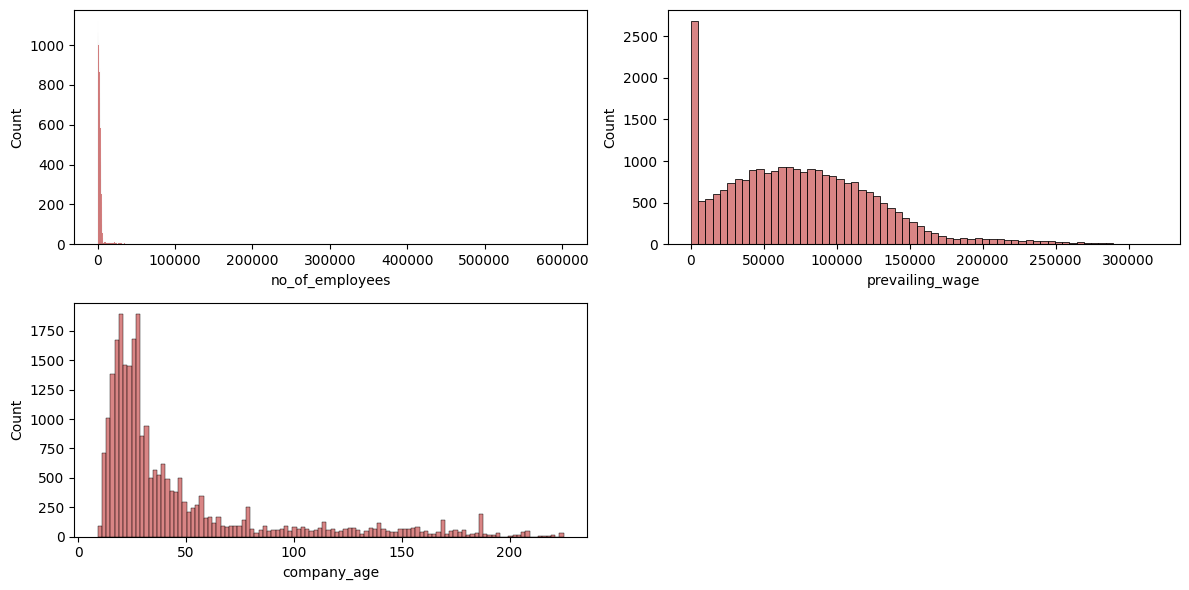

In [30]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2,2,i+1)
    sns.histplot(x=X[col],color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* Çalışan sayısı ve Şirket yaşı sütunları çarpık (skewed)
* Verileri daha Gaussian benzeri hale getirmek için her bir özelliğe güç dönüşümü (power transform) uygulayın.
* Güç dönüşümleri, verileri daha Gaussian benzeri hale getirmek için uygulanan parametreli, monotonik dönüşümlerin bir ailesidir. Bu, heteroskedastisite (sabit olmayan varyans) ile ilgili modelleme sorunları veya normal dağılımın arzu edildiği diğer durumlar için faydalıdır.

* Şu anda, PowerTransformer Box-Cox dönüşümünü ve Yeo-Johnson dönüşümünü desteklemektedir.

* Çarpıklığı (Skewness) Kontrol Etme

* Çarpıklık Nedir?

* Çarpıklık, bir veri setindeki simetrik çan eğrisinden veya normal dağılımdan sapmayı veya bozulmayı ifade eder. Eğri sağa veya sola kayarsa, bu çarpık (skewed) olarak tanımlanır. * Çarpıklık, verilen bir dağılımın normal dağılımdan ne kadar saptığını nicelendirmenin bir yolu olarak ölçülebilir. Normal dağılımın çarpıklığı sıfırdır.



* Box-Cox: Sadece pozitif veriler için uygundur ve verileri daha normal dağılıma dönüştürmek için kullanılır.
* Yeo-Johnson: Hem pozitif hem de negatif verilerle çalışabilir, bu nedenle daha genel bir çözüm sunar.
* PowerTransformer: Box-Cox ve Yeo-Johnson dönüşümlerini sağlayan bir sınıftır ve verilerin daha normal hale getirilmesi için kullanılır.

In [31]:
# Çarpıklığı hesaplamak 
# Skewness > 0 → Pozitif çarpıklık, yani dağılım sağa doğru kaymış.
# Skewness < 0 → Negatif çarpıklık, yani dağılım sola doğru kaymış.
# Skewness = 0 → Simetrik bir dağılım, yani normal dağılıma yakın.
X[continuous_features].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

* Pozitif Çarpıklık Gösterenler: company_age, no_of_employees.
* Outlier’ları (aykırı değerleri) ele alabiliriz ve ardından çarpıklığı kontrol edebiliriz.

## Power Transformer Uygulaması ile Aykırı Değerlerin Azaltılması

In [32]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['company_age','no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [33]:
X_copy = pd.DataFrame(X_copy,columns=transform_features)

In [34]:
X_copy

,company_age,no_of_employees
0,-0.955551,1.517300
1,-0.467001,0.030912
2,-1.078363,2.885076
3,1.630914,-1.343550
4,-0.738126,-0.432287
...,...,...
25475,-1.078363,0.079917
25476,-0.842544,0.235747
25477,1.550209,-0.413885
25478,1.684739,-0.111949


In [35]:
X_copy.skew(axis=0,skipna=True)

company_age        0.112260
no_of_employees    0.399339
dtype: float64

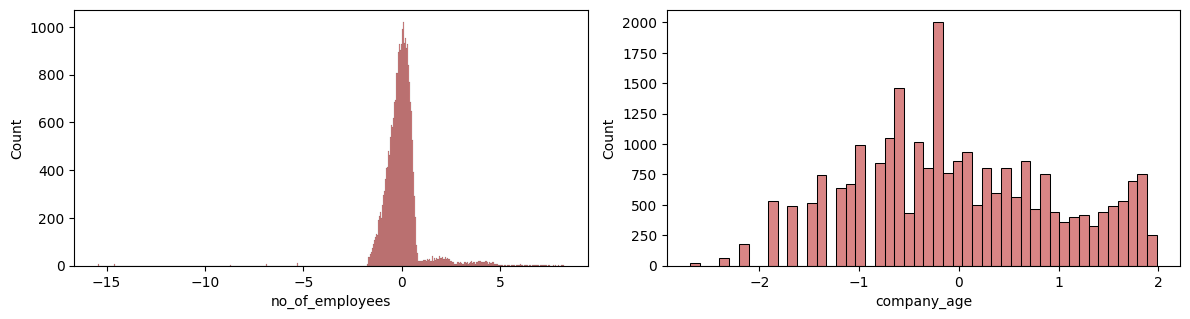

In [37]:
plt.figure(figsize=(12,6))
for i, col in enumerate(['no_of_employees','company_age']):
    plt.subplot(2,2,i+1)
    sns.histplot(x=X_copy[col],color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

Burada Yeo-Johnson yöntemi kullanılmıştır ve bu yöntem dönüşüm için hem pozitif hem de negatif veriyi destekler. Bu nedenle Yeo-Johnson ile Power Transformer kullanılabilir.

In [27]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


### Özellik Kodlama ve Ölçekleme
* Az sayıda benzersiz değeri olan ve sıralı olmayan sütunlar için One Hot Encoding

* One hot encoding, kategorik değişkenlerin, makine öğrenmesi algoritmalarına daha iyi tahmin yapabilmesi için uygun bir formata dönüştürülmesidir.
* Çok sayıda benzersiz kategoriye sahip sütunlar için Ordinal Encoding

* Ordinal encoding burada, label encoder’ın sütun dönüştürücü (column transformer) tarafından desteklenmesi için kullanılmaktadır.
* Ordinal encoding, sıralı değişkenler için kullanılır. Bu değişken, değerler arasında sıralı bir düzeni olan sonlu bir dizi ayrık değere sahiptir.
### Standart Ölçekleyici

* Özellikleri, ortalamayı çıkararak ve birim varyansa ölçekleyerek standartlaştırır.
###  Power Transformer

* Power transform, sayısal giriş veya çıkış değişkenlerini Gauss dağılımı veya daha Gauss’a yakın bir olasılık dağılımına dönüştürmek için kullanılan bir tekniktir.
Önişleme için özelliklerin seçilmesi

## Preprocessing using Column Transformer

In [38]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

# Dönüştürme adımları (Numeric, OneHot, Ordinal)
numeric_transformer = StandardScaler()  # Sayısal sütunlar için standartlaştırma
oh_transformer = OneHotEncoder()        # Kategorik sütunlar için One-Hot Encoding
ordinal_encoder = OrdinalEncoder()      # Sıralı kategorik sütunlar için Ordinal Encoding

# Power Transformer için bir pipeline oluşturuluyor
transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))  # Yeo-Johnson dönüşümü
])

# ColumnTransformer: Sütunlara göre dönüşüm işlemleri
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, oh_columns),  # One-Hot Encoding
        ("Ordinal_Encoder", ordinal_encoder, or_columns),  # Ordinal Encoding
        ("Transformer", transform_pipe, transform_columns),  # Power Transformation
        ("StandardScaler", numeric_transformer, num_features)  # Sayısal özellikler için scaling
    ]
)


In [39]:
X = preprocessor.fit_transform(X)

In [40]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

## Classification

In [41]:
# Gerekli kütüphaneleri import ediyoruz
from imblearn.combine import SMOTEENN

# Azınlık sınıfını yeniden örneklemek için SMOTEENN modelini oluşturuyoruz.
# SMOTEENN, SMOTE (azınlık sınıfını çoğaltma) ve ENN (yakın komşu düzenleme) yöntemlerini birleştirir.
smt = SMOTEENN(random_state=42, sampling_strategy='minority')

# X ve y ile fit_resample fonksiyonu ile modeli veri setimize uyguluyoruz.
# Bu işlem, azınlık sınıfının örneklerini çoğaltarak sınıf dengesizliğini düzeltecektir.
X_res, y_res = smt.fit_resample(X, y)

# Yeniden örneklenmiş veriyi X_res ve y_res olarak alıyoruz.

# Eğitim-Test Ayrımı (Train-Test Split)
* Eğitim-test ayrımı prosedürü, makine öğrenimi algoritmalarının, modelin eğitiminde kullanılmayan verilerle tahminler yapıldığında ne kadar iyi performans gösterdiğini tahmin etmek için kullanılır.

* Bu, hızlı ve kolay bir şekilde gerçekleştirilebilen bir prosedürdür ve sonuçları, makine öğrenimi algoritmalarının performansını karşılaştırmanıza olanak tanır.

In [42]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((13629, 24), (3408, 24))

In [43]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

def evaluate_clf(true, predicted):
    """
    true: Gerçek etiketler (sınıf etiketleri)
        - Modelin tahminlerini değerlendirmek için kullanılan gerçek değerler (etiketler).
        
    predicted: Model tarafından tahmin edilen etiketler
        - Modelin çıktısı, yani tahmin edilen sınıf etiketleri.
    """
    acc = accuracy_score(true, predicted)  # Doğruluk (Accuracy)
    # Doğruluk, doğru tahminlerin toplam tahminlere oranıdır. Modelin genel başarısını ölçer.
    
    f1 = f1_score(true, predicted)  # F1-Skoru (F1-score)
    # F1-skoru, Precision ve Recall'un harmonik ortalamasıdır. Sınıf dengesizliğinin olduğu durumlarda önemli bir metriktir.
    
    precision = precision_score(true, predicted)  # Kesinlik (Precision)
    # Kesinlik, doğru pozitif tahminlerin tüm pozitif tahminlere oranıdır. Modelin ne kadar doğru tahmin yaptığını gösterir.
    
    recall = recall_score(true, predicted)  # Duyarlılık (Recall)
    # Duyarlılık, doğru pozitif tahminlerin tüm gerçek pozitiflere oranıdır. Modelin tüm gerçek pozitif örnekleri tespit etme yeteneğini gösterir.
    
    roc_auc = roc_auc_score(true, predicted)  # ROC-AUC (Receiver Operating Characteristic - Area Under Curve)
    # ROC-AUC, modelin sınıfları ayırt etme yeteneğini ölçer. AUC değeri 1'e yaklaştıkça modelin performansı iyidir.
    
    return acc, f1 , precision, recall, roc_auc

In [45]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [46]:
from sklearn.model_selection import train_test_split
import pandas as pd

def evaluate_models(X, y, models):
    '''
    Bu fonksiyon, X ve y'yi alır ve model sözlüğünü değerlendirir.
    - Veriyi eğitim ve test olarak böler.
    - Verilen model sözlüğü üzerinden döngüyle geçer ve her model için değerlendirme metriklerini hesaplar.
    - Sonuç olarak tüm modellerin metriklerinin yer aldığı bir rapor döner.

    Parametreler:
    X (DataFrame): Özelliklerin yer aldığı veri seti.
    y (Series): Hedef değişkenin yer aldığı veri seti.
    models (dict): Anahtar-değer şeklinde model isimleri ve modellerin bulunduğu bir sözlük.

    Dönüş:
    report (DataFrame): Modellerin doğruluk ve diğer metrikleri içeren bir rapor.
    '''
    # Veriyi eğitim ve test olarak böler
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Model performansını depolayacak listeler
    models_list = []    # Model isimleri
    accuracy_list = []  # Test seti doğruluk değerleri
    auc = []            # ROC-AUC skorları
    
    # Modeller üzerinde döngü başlatıyoruz
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)  # Modeli eğitim verisi ile eğit

        # Eğitim verisi üzerinde tahminler yapıyoruz
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Eğitim seti performansı
        model_train_accuracy, model_train_f1, model_train_precision,\
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)

        # Test seti performansı
        model_test_accuracy, model_test_f1, model_test_precision,\
        model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        # Model adı
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Eğitim seti için model performansı')
        print("- Doğruluk (Accuracy): {:.4f}".format(model_train_accuracy))
        print('- F1 Skoru: {:.4f}'.format(model_train_f1)) 
        print('- Kesinlik (Precision): {:.4f}'.format(model_train_precision))
        print('- Duyarlılık (Recall): {:.4f}'.format(model_train_recall))
        print('- ROC AUC Skoru: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Test seti için model performansı')
        print('- Doğruluk (Accuracy): {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)  # Test seti doğruluğunu listeye ekle
        print('- F1 Skoru: {:.4f}'.format(model_test_f1))
        print('- Kesinlik (Precision): {:.4f}'.format(model_test_precision))
        print('- Duyarlılık (Recall): {:.4f}'.format(model_test_recall))
        print('- ROC AUC Skoru: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)  # Test seti ROC-AUC skorunu listeye ekle
        print('='*35)
        print('\n')
    
    # Modellerin isimlerini ve doğruluklarını içeren bir rapor oluştur
    report = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Adı', 'Doğruluk (Accuracy)'])\
        .sort_values(by=['Doğruluk (Accuracy)'], ascending=False)  # Doğruluğa göre sıralama

    return report

# MODEL TRAİNİNG

In [47]:

base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Eğitim seti için model performansı
- Doğruluk (Accuracy): 1.0000
- F1 Skoru: 1.0000
- Kesinlik (Precision): 1.0000
- Duyarlılık (Recall): 1.0000
- ROC AUC Skoru: 1.0000
----------------------------------
Test seti için model performansı
- Doğruluk (Accuracy): 0.9516
- F1 Skoru: 0.9555
- Kesinlik (Precision): 0.9481
- Duyarlılık (Recall): 0.9630
- ROC AUC Skoru: 0.9506


Decision Tree
Eğitim seti için model performansı
- Doğruluk (Accuracy): 1.0000
- F1 Skoru: 1.0000
- Kesinlik (Precision): 1.0000
- Duyarlılık (Recall): 1.0000
- ROC AUC Skoru: 1.0000
----------------------------------
Test seti için model performansı
- Doğruluk (Accuracy): 0.9252
- F1 Skoru: 0.9312
- Kesinlik (Precision): 0.9249
- Duyarlılık (Recall): 0.9375
- ROC AUC Skoru: 0.9241


Gradient Boosting
Eğitim seti için model performansı
- Doğruluk (Accuracy): 0.8897
- F1 Skoru: 0.8965
- Kesinlik (Precision): 0.9068
- Duyarlılık (Recall): 0.8865
- ROC AUC Skoru: 0.8900
----------------------------------
Test

In [48]:
base_model_report

,Model Adı,Doğruluk (Accuracy)
0,Random Forest,0.951585
4,K-Neighbors Classifier,0.941608
5,XGBClassifier,0.935153
6,CatBoosting Classifier,0.928110
1,Decision Tree,0.925176
2,Gradient Boosting,0.879108
7,Support Vector Classifier,0.857101
8,AdaBoost Classifier,0.849178
3,Logistic Regression,0.725646


* Burada Random Forest için Hiperparametre Ayarını (Hyperparameter Tuning) kullanabiliriz.

* Random Forest için parametre dağılımını tanımlayın.

In [49]:
# XGBoost Hiperparametre Ayarları
xgboost_params = {
    'max_depth': range(3, 10, 2),          # 'max_depth': 3'ten 10'a kadar 2'şer artarak değerler
    'min_child_weight': range(1, 6, 2)     # 'min_child_weight': 1'den 6'ya kadar 2'şer artarak değerler
}

# Random Forest Hiperparametre Ayarları
rf_params = {
    "max_depth": [10, 12, None, 15, 20],   # 'max_depth': Ağaç derinlikleri (None, sınırsız derinlik)
    "max_features": ['sqrt', 'log2', None], # 'max_features': Her ağaçta kullanılacak özellik sayısı ('sqrt' ve 'log2' genelde iyi seçimlerdir)
    "n_estimators": [10, 50, 100, 200]     # 'n_estimators': Kullanılacak ağaç sayısı
}

# KNN Hiperparametre Ayarları
knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],  # 'algorithm': KNN algoritması için kullanılacak metotlar
    "weights": ['uniform', 'distance'],                      # 'weights': Komşulara verilecek ağırlık ('uniform' eşit, 'distance' uzaklığa göre)
    "n_neighbors": [3, 4, 5, 7, 9]                           # 'n_neighbors': KNN için komşu sayısı
}


In [50]:
# Hiperparametre tuning için kullanılacak modellerin listesi
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),  # XGBoost modelinin hiperparametreleri
    ("RF", RandomForestClassifier(), rf_params),  # Random Forest modelinin hiperparametreleri
    ("KNN", KNeighborsClassifier(), knn_params)   # KNN modelinin hiperparametreleri
]

In [51]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.3s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.3s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.3s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.2s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.3s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.3s
[CV] END ....................max_depth=5, min_ch

In [52]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}}

In [53]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Eğitim seti için model performansı
- Doğruluk (Accuracy): 1.0000
- F1 Skoru: 1.0000
- Kesinlik (Precision): 1.0000
- Duyarlılık (Recall): 1.0000
- ROC AUC Skoru: 1.0000
----------------------------------
Test seti için model performansı
- Doğruluk (Accuracy): 0.9513
- F1 Skoru: 0.9552
- Kesinlik (Precision): 0.9490
- Duyarlılık (Recall): 0.9614
- ROC AUC Skoru: 0.9504


KNeighborsClassifier
Eğitim seti için model performansı
- Doğruluk (Accuracy): 1.0000
- F1 Skoru: 1.0000
- Kesinlik (Precision): 1.0000
- Duyarlılık (Recall): 1.0000
- ROC AUC Skoru: 1.0000
----------------------------------
Test seti için model performansı
- Doğruluk (Accuracy): 0.9683
- F1 Skoru: 0.9711
- Kesinlik (Precision): 0.9577
- Duyarlılık (Recall): 0.9848
- ROC AUC Skoru: 0.9669


XGBClassifier
Eğitim seti için model performansı
- Doğruluk (Accuracy): 0.9993
- F1 Skoru: 0.9993
- Kesinlik (Precision): 0.9986
- Duyarlılık (Recall): 1.0000
- ROC AUC Skoru: 0.9992
-------------------------

In [54]:
tuned_report

,Model Adı,Doğruluk (Accuracy)
1,KNeighborsClassifier,0.968310
0,Random Forest Classifier,0.951291
2,XGBClassifier,0.945716


In [55]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9683
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1568
           1       0.96      0.98      0.97      1840

    accuracy                           0.97      3408
   macro avg       0.97      0.97      0.97      3408
weighted avg       0.97      0.97      0.97      3408



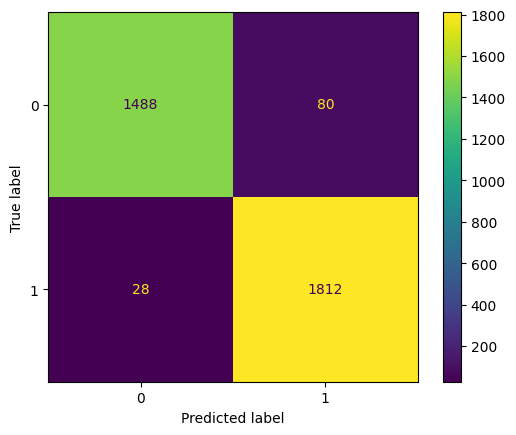

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

# Best Model is K-Nearest Neighbor(KNN) with Accuracy 96.6